In [103]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [104]:
# Loading Formula One Dataset
data = pd.read_csv('ecofootprint.csv')

#### Starts off with Ecological Footprint dataset being loaded from the CSV file listed on :

#### https://www.kaggle.com/usharengaraju/ecological-footprint . 

#### It includes crop_land, forest_land, and built_up_land

In [105]:
# Display of variety of datapoints in "results.csv"
data.tail

<bound method NDFrame.tail of        country  year  country_code        record     crop_land  grazing_land  \
0      Armenia  1992             1    AreaPerCap  1.400203e-01  1.991593e-01   
1      Armenia  1992             1     AreaTotHA  4.830000e+05  6.870000e+05   
2      Armenia  1992             1  BiocapPerCap  1.611286e-01  1.350234e-01   
3      Armenia  1992             1  BiocapTotGHA  5.558130e+05  4.657633e+05   
4      Armenia  1992             1  EFConsPerCap  3.909225e-01  1.891373e-01   
...        ...   ...           ...           ...           ...           ...   
69611    World  2014          5001  BiocapTotGHA  3.996304e+09  1.515536e+09   
69612    World  2014          5001  EFConsPerCap  5.500165e-01  1.444376e-01   
69613    World  2014          5001  EFConsTotGHA  3.996304e+09  1.049453e+09   
69614    World  2014          5001  EFProdPerCap  5.500165e-01  1.444376e-01   
69615    World  2014          5001  EFProdTotGHA  3.996304e+09  1.049453e+09   

        f

In [106]:
# Reducing the number of datapoints, dropping ones which wouldn't improve results. 
# Also clearing rows with any empty fields. 

data = data.dropna()
data.shape



(50824, 12)

Text(0, 0.5, 'Total Footprint')

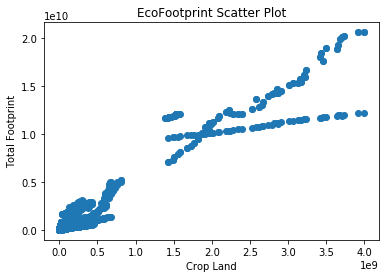

In [107]:
# Processing preliminary scatter plot, which includes crop_land and total footprint. 

plt.scatter(data.crop_land, data.total)
plt.title('EcoFootprint Scatter Plot')
plt.xlabel('Crop Land')
plt.ylabel('Total Footprint')

In [108]:
data = data.set_index('year')
data.head(3)


,country,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
year,,,,,,,,,,,
1992,Armenia,1,AreaPerCap,0.140020,0.199159,0.097000,0.036817,0.029258,0.0,5.022540e-01,3A
1992,Armenia,1,AreaTotHA,483000.000000,687000.000000,334600.000000,127000.000000,100925.003100,0.0,1.732525e+06,3A
1992,Armenia,1,BiocapPerCap,0.161129,0.135023,0.083836,0.013718,0.033669,0.0,4.273741e-01,3A


In [109]:
data.index


Int64Index([1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1993, 1993,
            ...
            2013, 2013, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014],
           dtype='int64', name='year', length=50824)

In [110]:
data.columns

Index(['country', 'country_code', 'record', 'crop_land', 'grazing_land',
       'forest_land', 'fishing_ground', 'built_up_land', 'carbon', 'total',
       'QScore'],
      dtype='object')

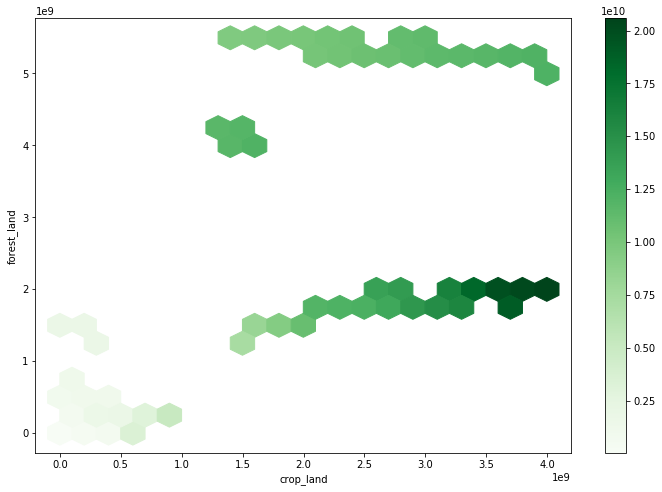

In [111]:
 
data.plot(
    kind='hexbin',
    x='crop_land',
    y='forest_land',
    C='total',
    gridsize=20,
    figsize=(12,8),
    cmap="Greens", # defaults to greenish
    sharex=False # required to get rid of a bug
)

In [112]:
# Remaining rows after filtering through data
data.head


<bound method NDFrame.head of       country  country_code        record     crop_land  grazing_land  \
year                                                                    
1992  Armenia             1    AreaPerCap  1.400203e-01  1.991593e-01   
1992  Armenia             1     AreaTotHA  4.830000e+05  6.870000e+05   
1992  Armenia             1  BiocapPerCap  1.611286e-01  1.350234e-01   
1992  Armenia             1  BiocapTotGHA  5.558130e+05  4.657633e+05   
1992  Armenia             1  EFConsPerCap  3.909225e-01  1.891373e-01   
...       ...           ...           ...           ...           ...   
2014    World          5001  BiocapTotGHA  3.996304e+09  1.515536e+09   
2014    World          5001  EFConsPerCap  5.500165e-01  1.444376e-01   
2014    World          5001  EFConsTotGHA  3.996304e+09  1.049453e+09   
2014    World          5001  EFProdPerCap  5.500165e-01  1.444376e-01   
2014    World          5001  EFProdTotGHA  3.996304e+09  1.049453e+09   

       forest_land  

In [113]:
#X_train, X_test, y_train, y_test = train_test_split(data.driverId, data.position)
X_train, X_test, y_train, y_test = train_test_split(data.forest_land, data.total, test_size=0.10)

In [114]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [115]:
# KNN Algorithm
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(algorithm='brute')

In [116]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [117]:
knn.score(X_test,y_test)

0.9617669933824177

In [118]:
knn.predict([[1]])

array([4.64980849])

In [119]:
# Random Forest Algorithm
from sklearn.ensemble import RandomForestRegressor
rforest = RandomForestRegressor(n_estimators=20, random_state=0)
rforest.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [120]:
# So far, producing between 94 to 97% accuracy

rforest.score(X_test,y_test)

0.9617084453612912

In [123]:
rforest.predict([[4]])

array([6.14195728])